## Visualising Image
Below shows some quantitative information about the number of electrons or particles in each sample. One can see such information by adjusting the file_index value.

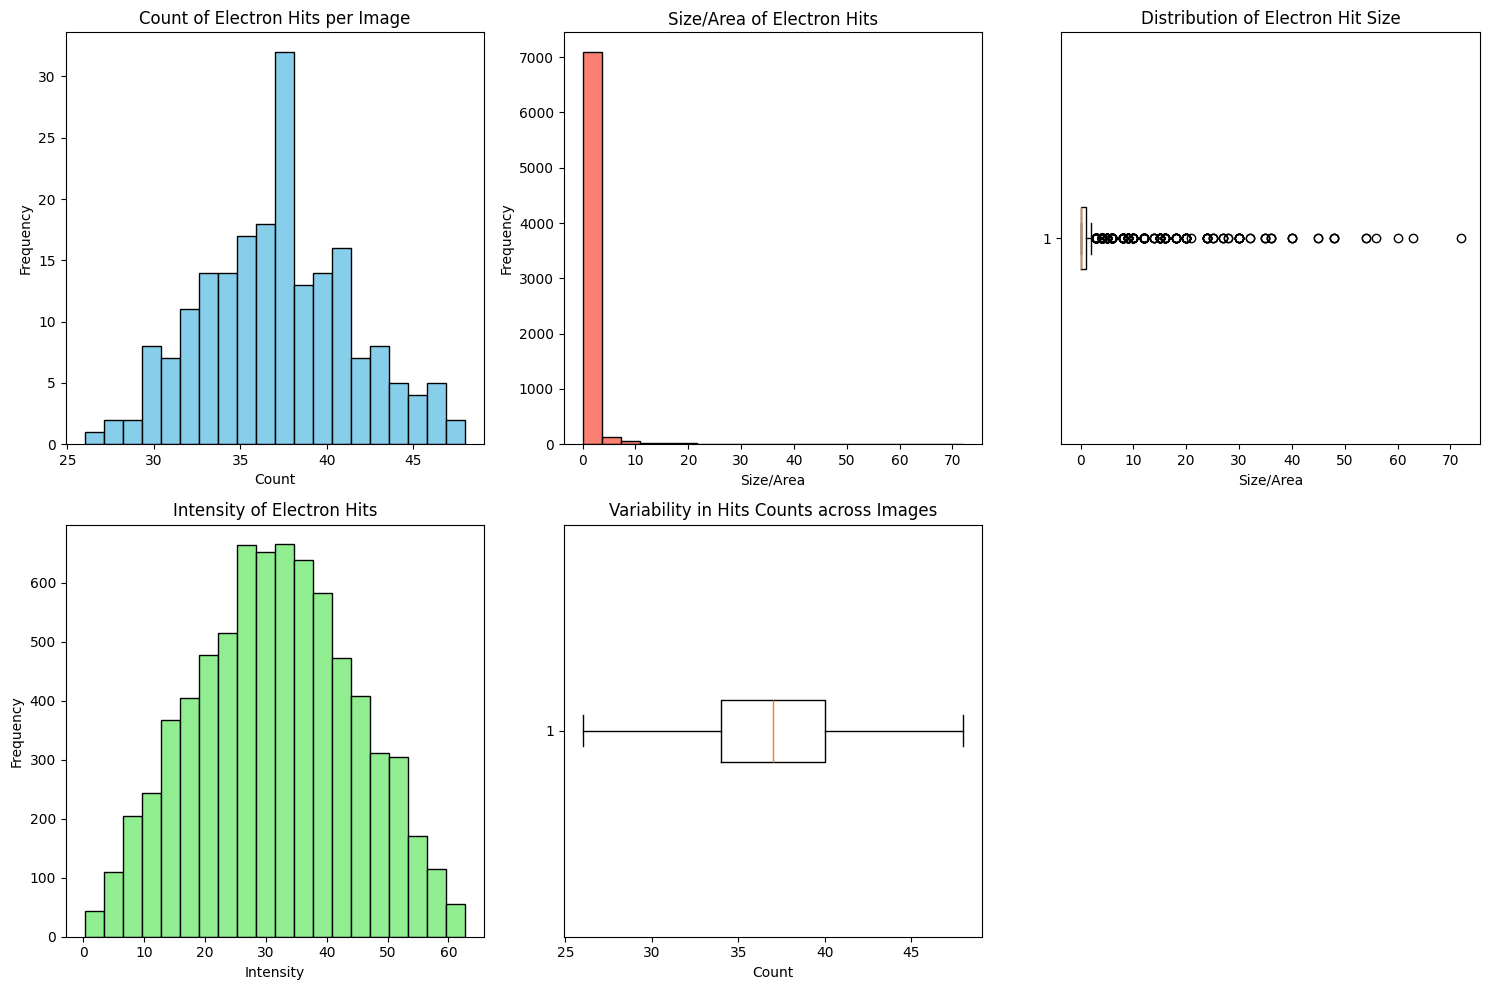

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load preprocessed data for a specific file (adjust file index as needed)
file_index = 7
imgs = np.load('/home/m3-learning/Documents/myML/Training/preprocessed_data/%03d_img.npz' % file_index, allow_pickle=True)
boxes = np.load('/home/m3-learning/Documents/myML/Training/preprocessed_data/%03d_box.npz' % file_index, allow_pickle=True)

# Initialize lists to store feature values for visualization
electron_hits_count = []
electron_hit_sizes = []
electron_hit_intensity = []
electron_hit_x_coords = []
electron_hit_y_coords = []

# Calculate features
for i in range(len(imgs.files)):
    img = imgs['arr_' + str(i)]
    box = boxes['arr_' + str(i)]
    
    # 1. Count of Electron Hits per Image
    electron_hits_count.append(len(box))
    
    # 2. Size/Area of Electron Hits
    sizes = [(b[2] - b[0]) * (b[3] - b[1]) for b in box]
    electron_hit_sizes.extend(sizes)
    
    # 3. Intensity of Electron Hits (mean pixel value within each box)
    intensities = [np.mean(img) for img in box]
    electron_hit_intensity.extend(intensities)
    
    # 4. Spatial distribution of Electron Hits (x, y coordinates)
    x_coords = [(b[1] + b[3]) / 2 for b in box]
    y_coords = [(b[0] + b[2]) / 2 for b in box]
    electron_hit_x_coords.extend(x_coords)
    electron_hit_y_coords.extend(y_coords)

    

# Visualization
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# 1. Count of Electron Hits per Image (Histogram)
axs[0, 0].hist(electron_hits_count, bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Count of Electron Hits per Image')
axs[0, 0].set_xlabel('Count')
axs[0, 0].set_ylabel('Frequency')

# 2. Size/Area of Electron Hits (Histogram)
axs[0, 1].hist(electron_hit_sizes, bins=20, color='salmon', edgecolor='black')
axs[0, 1].set_title('Size/Area of Electron Hits')
axs[0, 1].set_xlabel('Size/Area')
axs[0, 1].set_ylabel('Frequency')

# 3. Distribution of Electron Hit Size (Boxplot)
axs[0, 2].boxplot(electron_hit_sizes, vert=False)
axs[0, 2].set_title('Distribution of Electron Hit Size')
axs[0, 2].set_xlabel('Size/Area')

# 4. Intensity of Electron Hits (Histogram)
axs[1, 0].hist(electron_hit_intensity, bins=20, color='lightgreen', edgecolor='black')
axs[1, 0].set_title('Intensity of Electron Hits')
axs[1, 0].set_xlabel('Intensity')
axs[1, 0].set_ylabel('Frequency')

# 5. Variability in Hits Counts across Images (Boxplot)
axs[1, 1].boxplot(electron_hits_count, vert=False)
axs[1, 1].set_title('Variability in Hits Counts across Images')
axs[1, 1].set_xlabel('Count')

# 6. Spatial Distribution of Electron Hits (Scatter plot)
axs[1, 2].scatter(electron_hit_x_coords, electron_hit_y_coords, color='orange', alpha=0.5)
axs[1, 2].set_title('Spatial Distribution of Electron Hits')
axs[1, 2].set_xlabel('X Coordinate')
axs[1, 2].set_ylabel('Y Coordinate')

# Remove the empty subplot
fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()


The code below produces a Heat map that shows electron hit spatial distribution. Each heat map can be visualised by adjusting the file_index value.
A Heatmap was chosen to accurately show the intensity of electron counts at different positions in each image.

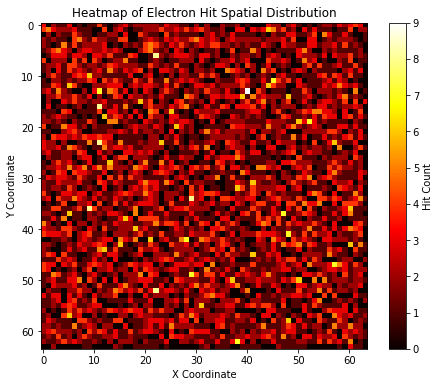

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load preprocessed data for a specific file (adjust file index as needed)
file_index = 7
imgs = np.load('/home/m3-learning/Documents/myML/Training/preprocessed_data/%03d_img.npz' % file_index, allow_pickle=True)
boxes = np.load('/home/m3-learning/Documents/myML/Training/preprocessed_data/%03d_box.npz' % file_index, allow_pickle=True)

# Initialize an empty grid to represent the spatial distribution
grid_size = 64  # Assuming images are of size 64x64
spatial_distribution = np.zeros((grid_size, grid_size))

# Calculate spatial distribution of electron hits
for i in range(len(imgs.files)):
    img = imgs['arr_' + str(i)]
    box = boxes['arr_' + str(i)]
    
    for b in box:
        # Compute the center of each bounding box
        center_x = int((b[1] + b[3]) / 2)
        center_y = int((b[0] + b[2]) / 2)
        
        # Increment the corresponding grid cell to represent hit presence
        spatial_distribution[center_y, center_x] += 1

# Create a heatmap for spatial distribution
plt.figure(figsize=(8, 6))
plt.imshow(spatial_distribution, cmap='hot', interpolation='nearest')
plt.title('Heatmap of Electron Hit Spatial Distribution')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.colorbar(label='Hit Count')
plt.show()


The Dash Plots for each sample can be adjusted as well by changing the file_index value.

In [3]:
import dash
import plotly.express as px
import numpy as np
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
from jupyter_dash import JupyterDash
from IPython.display import IFrame

# Your data processing code to load and process image data
file_index = 10
imgs = np.load('/home/m3-learning/Documents/myML/Training/preprocessed_data/%03d_img.npz' % file_index, allow_pickle=True)
boxes = np.load('/home/m3-learning/Documents/myML/Training/preprocessed_data/%03d_box.npz' % file_index, allow_pickle=True)

# Initialize lists to store feature values for visualization
electron_hits_count = []
electron_hit_sizes = []
electron_hit_intensity = []
electron_hit_x_coords = []
electron_hit_y_coords = []

# Calculate features
for i in range(len(imgs.files)):
    img = imgs['arr_' + str(i)]
    box = boxes['arr_' + str(i)]
    
    # 1. Count of Electron Hits per Image
    electron_hits_count.append(len(box))
    
    # 2. Size/Area of Electron Hits
    sizes = [(b[2] - b[0]) * (b[3] - b[1]) for b in box]
    electron_hit_sizes.extend(sizes)
    
    # 3. Intensity of Electron Hits (mean pixel value within each box)
    intensities = [np.mean(img) for img in box]
    electron_hit_intensity.extend(intensities)
    
    # 4. Spatial distribution of Electron Hits (x, y coordinates)
    x_coords = [(b[1] + b[3]) / 2 for b in box]
    y_coords = [(b[0] + b[2]) / 2 for b in box]
    electron_hit_x_coords.extend(x_coords)
    electron_hit_y_coords.extend(y_coords)


# Create the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Electron Hits Visualization"),
    html.Label("Select Visualization:"),
    dcc.Dropdown(
        id='plot-selector',
        options=[
            {'label': 'Count of Electron Hits per Image', 'value': 'count-histogram'},
            {'label': 'Size/Area of Electron Hits', 'value': 'size-histogram'},
            {'label': 'Distribution of Electron Hit Size', 'value': 'size-boxplot'},
            {'label': 'Intensity of Electron Hits', 'value': 'intensity-histogram'},
            {'label': 'Variability in Hits Counts across Images', 'value': 'count-boxplot'},
            {'label': 'Spatial Distribution of Electron Hits', 'value': 'spatial-distribution'}
        ],
        value='count-histogram'  # Default value
    ),
    dcc.Graph(id='selected-plot')
])

# Callback to update the displayed plot based on dropdown selection
@app.callback(
    dash.dependencies.Output('selected-plot', 'figure'),
    [dash.dependencies.Input('plot-selector', 'value')]
)
def update_plot(selected_plot):
    if selected_plot == 'count-histogram':
        return px.histogram(x=electron_hits_count, nbins=20, labels={'x': 'Count', 'y': 'Frequency'},
                            title='Count of Electron Hits per Image')
    elif selected_plot == 'size-histogram':
        return px.histogram(x=electron_hit_sizes, nbins=20, labels={'x': 'Size/Area', 'y': 'Frequency'},
                            title='Size/Area of Electron Hits')
    elif selected_plot == 'size-boxplot':
        return px.box(x=electron_hit_sizes, labels={'x': 'Size/Area'},
                      title='Distribution of Electron Hit Size')
    elif selected_plot == 'intensity-histogram':
        return px.histogram(x=electron_hit_intensity, nbins=20, labels={'x': 'Intensity', 'y': 'Frequency'},
                            title='Intensity of Electron Hits')
    elif selected_plot == 'count-boxplot':
        return px.box(x=electron_hits_count, labels={'x': 'Count'},
                      title='Variability in Hits Counts across Images')
    elif selected_plot == 'spatial-distribution':
        return px.scatter(x=electron_hit_x_coords, y=electron_hit_y_coords,
                          labels={'x': 'X Coordinate', 'y': 'Y Coordinate'},
                          title='Spatial Distribution of Electron Hits')

# Run the app
app.run_server()


Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
